In [23]:
import pandas as pd

df = pd.read_csv('csv_result-WISDM_ar_v1.csv')

print(df.head())


   id  UNIQUE_ID  user    X0    X1    X2    X3    X4    X5    X6  ...   YPEAK  \
0   1          1    33  0.04  0.09  0.14  0.12  0.11  0.10  0.08  ...  293.94   
1   2          2    33  0.12  0.12  0.06  0.07  0.11  0.10  0.11  ...  269.44   
2   3          3    33  0.14  0.09  0.11  0.09  0.09  0.11  0.12  ...  248.65   
3   4          4    33  0.06  0.10  0.09  0.09  0.11  0.07  0.12  ...  709.09   
4   5          5    33  0.12  0.11  0.10  0.08  0.10  0.14  0.10  ...    3300   

     ZPEAK  XABSOLDEV  YABSOLDEV  ZABSOLDEV  XSTANDDEV  YSTANDDEV  ZSTANDDEV  \
0     1550       3.29       7.21       4.00       4.05       8.17       4.05   
1  1233.33       4.23       6.88       4.05       5.43       8.19       5.43   
2     1780       4.18       6.89       4.07       5.55       8.19       5.55   
3     1380       2.26       4.13       2.49       2.87       4.95       2.87   
4     1775       2.29       3.94       2.41       3.08       4.64       3.08   

   RESULTANT   class{  
0      1

In [24]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [25]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [26]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [28]:
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [29]:
dtc.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

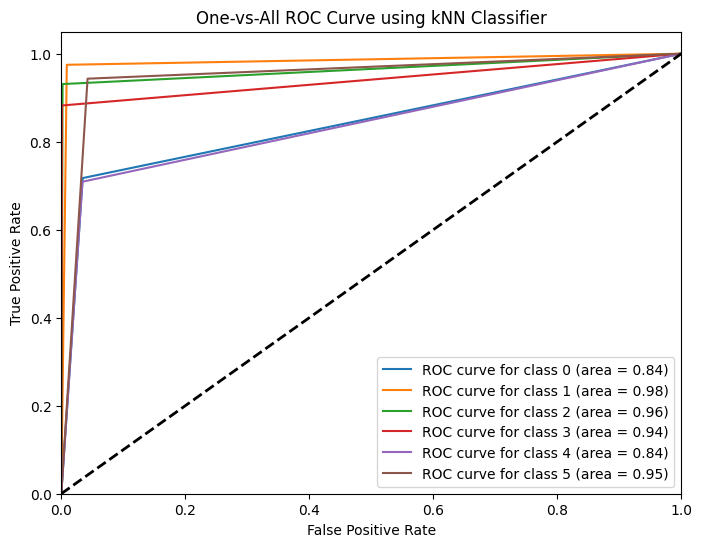

In [31]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
dtc_prob = dtc.predict_proba(x_test)
knn_prob = knn.predict_proba(x_test)
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], dtc_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-All ROC Curve using kNN Classifier')
plt.legend(loc='lower right')
plt.show()


In [33]:
y_pred_dt = dtc.predict(x_test)
y_pred_knn = knn.predict(x_test)
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")


Decision Tree Accuracy: 0.9049544994944388
KNN Accuracy: 0.5793731041456016
